# Cervical Cancer Prediction: EDA
**CC3084 DATA SCIENCE - LAB 1**
> Samuel A. Chamalé, `cha21881@uvg.edu.gt` </br> Adrian Rodriguez, `rod21691@uvg.edu.gt`
---

In [1]:
%matplotlib inline

In [2]:
import warnings as wr  # Avoid warnings
wr.filterwarnings('ignore')

In [3]:
import pandas as pd  # Data manipulation

# from ydata_profiling import ProfileReport

import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
MAIN_SOURCE = './archive/risk_factors_cervical_cancer.csv'
df = pd.read_csv(MAIN_SOURCE)

## [1] Quick data exploration

In [5]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


Some basic manual info...

In [6]:
df.shape

(858, 36)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

Consolidated data profiling...

In [8]:
# ✅ Commented to avoid time consuming process, uncomment to generate the report
# profile = ProfileReport(df, title='Cervical Cancer', explorative=True)
# profile.to_file('./archive/report.html')
# profile.to_notebook_iframe()

### Results analysis

- Interestingly, There are 20 duplicated rows, this is an small amount representing only the 2.3% of the dataset. This rows can't be directly categorized as an error, because some diagnosis can result coincidentally in similar values. 
- According to the matrix plot there are not missing values. Although while visualizing some rows, there are visible missing values represented as `?`. We need to handle this further.
- We also found that most of the variables are imbalanced, this can affect a posterior prediction/regression model selection.
- Based on the heatmap, we found a significant amount of correlated variables. This may seem positive, but considering the relevance of this variables over an effective diagnosis is still pending. We are not experts on the implications of some medical specific variables, so is hard to determine the reason of correlation.


## [2] Determining dataset variables types

In [9]:
df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

Checking the existence of `?` in the cols.

In [10]:
for col in df.columns:
    print(col, df[col].unique())

Age [18 15 34 52 46 42 51 26 45 44 27 43 40 41 39 37 38 36 35 33 31 32 30 23
 28 29 20 25 21 24 22 48 19 17 16 14 59 79 84 47 13 70 50 49]
Number of sexual partners ['4.0' '1.0' '5.0' '3.0' '2.0' '6.0' '?' '7.0' '15.0' '8.0' '10.0' '28.0'
 '9.0']
First sexual intercourse ['15.0' '14.0' '?' '16.0' '21.0' '23.0' '17.0' '26.0' '20.0' '25.0' '18.0'
 '27.0' '19.0' '24.0' '32.0' '13.0' '29.0' '11.0' '12.0' '22.0' '28.0'
 '10.0']
Num of pregnancies ['1.0' '4.0' '2.0' '6.0' '3.0' '5.0' '?' '8.0' '7.0' '0.0' '11.0' '10.0']
Smokes ['0.0' '1.0' '?']
Smokes (years) ['0.0' '37.0' '34.0' '1.266972909' '3.0' '12.0' '?' '18.0' '7.0' '19.0'
 '21.0' '15.0' '13.0' '16.0' '8.0' '4.0' '10.0' '22.0' '14.0' '0.5' '11.0'
 '9.0' '2.0' '5.0' '6.0' '1.0' '32.0' '24.0' '28.0' '20.0' '0.16']
Smokes (packs/year) ['0.0' '37.0' '3.4' '2.8' '0.04' '0.5132021277' '2.4' '6.0' '?' '9.0'
 '1.6' '19.0' '21.0' '0.32' '2.6' '0.8' '15.0' '2.0' '5.7' '1.0' '3.3'
 '3.5' '12.0' '0.025' '2.75' '0.2' '1.4' '5.0' '2.1' '0.7' '1.2' 

Replacing the `?` as a valid `null` definition.

In [11]:
# Replacing the ? as a valid null value
df = df.replace('?', None)

In [12]:
df.isnull().sum() / df.shape[0] * 100

Age                                    0.000000
Number of sexual partners              3.030303
First sexual intercourse               0.815851
Num of pregnancies                     6.526807
Smokes                                 1.515152
Smokes (years)                         1.515152
Smokes (packs/year)                    1.515152
Hormonal Contraceptives               12.587413
Hormonal Contraceptives (years)       12.587413
IUD                                   13.636364
IUD (years)                           13.636364
STDs                                  12.237762
STDs (number)                         12.237762
STDs:condylomatosis                   12.237762
STDs:cervical condylomatosis          12.237762
STDs:vaginal condylomatosis           12.237762
STDs:vulvo-perineal condylomatosis    12.237762
STDs:syphilis                         12.237762
STDs:pelvic inflammatory disease      12.237762
STDs:genital herpes                   12.237762
STDs:molluscum contagiosum            12

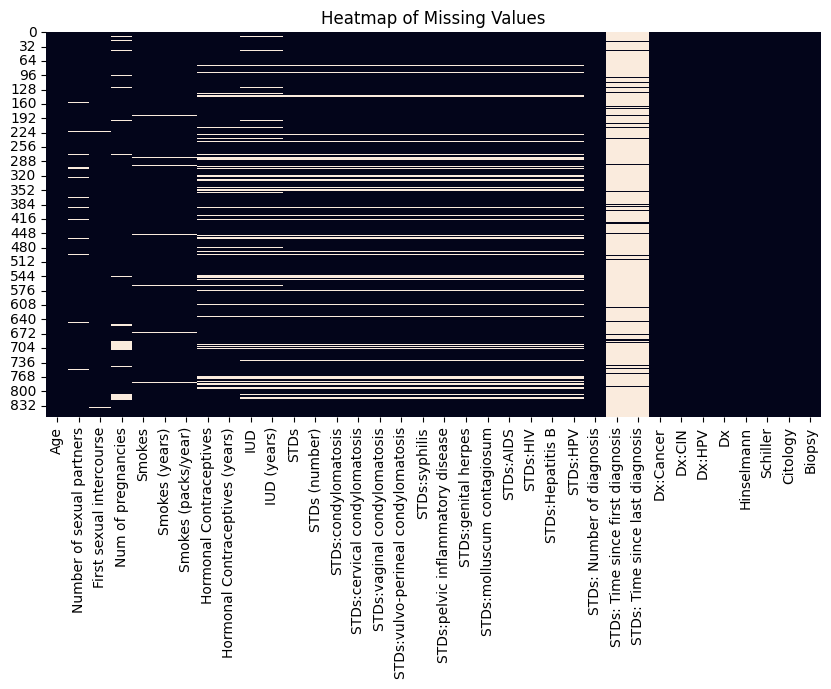

In [13]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Heatmap of Missing Values")  # Adding a title
plt.show()

### Notes:
- Handling these missing values ​​is essential to the application of the model. But for the moment, we will leave the set as it is. In a future step [6], we will make a decision on how to treat these variables.

> ❌ We will remove the columns with an excessive percentage of null values. `STDs: Time since first diagnosis` and `STDs: Time since last diagnosis`

In [14]:
# Dropping the columns with more than 90% of missing values automatically
df = df.dropna(thresh=0.1*df.shape[0], axis=1)

Numerical...

> ⚠️ Based on the codebook provided we know that many of the variables are binary, so even the data type is numerical the correct category is qualitative.

> ⚠️ We also know that all the variables are numerical.

In [15]:
df = df.apply(pd.to_numeric, errors='ignore')

After doing this conversion, the null values will remain as nan...

In [16]:
for col in df.columns:
    print(col, df[col].unique())

Age [18 15 34 52 46 42 51 26 45 44 27 43 40 41 39 37 38 36 35 33 31 32 30 23
 28 29 20 25 21 24 22 48 19 17 16 14 59 79 84 47 13 70 50 49]
Number of sexual partners [ 4.  1.  5.  3.  2.  6. nan  7. 15.  8. 10. 28.  9.]
First sexual intercourse [15. 14. nan 16. 21. 23. 17. 26. 20. 25. 18. 27. 19. 24. 32. 13. 29. 11.
 12. 22. 28. 10.]
Num of pregnancies [ 1.  4.  2.  6.  3.  5. nan  8.  7.  0. 11. 10.]
Smokes [ 0.  1. nan]
Smokes (years) [ 0.         37.         34.          1.26697291  3.         12.
         nan 18.          7.         19.         21.         15.
 13.         16.          8.          4.         10.         22.
 14.          0.5        11.          9.          2.          5.
  6.          1.         32.         24.         28.         20.
  0.16      ]
Smokes (packs/year) [0.00000000e+00 3.70000000e+01 3.40000000e+00 2.80000000e+00
 4.00000000e-02 5.13202128e-01 2.40000000e+00 6.00000000e+00
            nan 9.00000000e+00 1.60000000e+00 1.90000000e+01
 2.10000000e+01 3.

In [17]:
df.dtypes

Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

In [18]:
for col in df.columns:
    print(col, df[col].unique())

Age [18 15 34 52 46 42 51 26 45 44 27 43 40 41 39 37 38 36 35 33 31 32 30 23
 28 29 20 25 21 24 22 48 19 17 16 14 59 79 84 47 13 70 50 49]
Number of sexual partners [ 4.  1.  5.  3.  2.  6. nan  7. 15.  8. 10. 28.  9.]
First sexual intercourse [15. 14. nan 16. 21. 23. 17. 26. 20. 25. 18. 27. 19. 24. 32. 13. 29. 11.
 12. 22. 28. 10.]
Num of pregnancies [ 1.  4.  2.  6.  3.  5. nan  8.  7.  0. 11. 10.]
Smokes [ 0.  1. nan]
Smokes (years) [ 0.         37.         34.          1.26697291  3.         12.
         nan 18.          7.         19.         21.         15.
 13.         16.          8.          4.         10.         22.
 14.          0.5        11.          9.          2.          5.
  6.          1.         32.         24.         28.         20.
  0.16      ]
Smokes (packs/year) [0.00000000e+00 3.70000000e+01 3.40000000e+00 2.80000000e+00
 4.00000000e-02 5.13202128e-01 2.40000000e+00 6.00000000e+00
            nan 9.00000000e+00 1.60000000e+00 1.90000000e+01
 2.10000000e+01 3.

> ❌ Ok, something interesting found here is that `STDs:AIDS`, that stands for *Si tiene SIDA*, have only `0` and `nan` values. Cause all the intelligible values are the same, it lacks relevance and can be removed.

In [19]:
df = df.drop('STDs:AIDS', axis=1)

#### Variables classification

##### Qualitative

**Binary/Nominal**
- `STDs.condylomatosis`: si ha tenido condilomatosis
- `STDs.cervical.condylomatosis`: si ha tenido condilomatosis cervical
- `STDs.vaginal.condylomatosis`: Si ha tenido condilomatosis vaginal
- `STDs.vulvo.perineal.condylomatosis`: Si ha tenido condilomatosis vulvo perineal
- `STDs.syphilis`: Si ha tenido Sífilis
- `STDs.pelvic.inflammatory.disease`: Si ha tenido inflamaciones pélvicas
- `STDs.genital.herpes`: si ha tenido herpes genital
- `STDs.molluscum.contagiosum`: Si ha tenido molusco contagioso
- `STDs.HIV`: Si tiene VIH
- `STDs.Hepatitis.B`: si ha tenido o tiene hepatitis B
- `STDs.HPV`: Si ha tenido o tiene Virus del Papiloma Humano (VPH)
- `Hinselmann`: Si hicieron Colposcopía
- `Schiller`: Si hicieron la prueba de Schiller
- `Citology`: Si hicieron citología o no
- `Biopsy`: Si hicieron Biopsia o no
- `Smokes`: Si fuma o no
- `Hormonal.Contraceptives`: Si usa anticonceptivos hormonales o no
- `IUD`: Si tiene colocado algún dispositivo intrauterino (DIU)
- `STDs`: Si ha tenido enfermedades de transmisión sexual (ETS)
- `Dx.Cancer`: Si tiene diagnóstico de cáncer o no
- `Dx.CIN`: Si tiene diagnóstico de NIC (Neoplasia Intraepitelial Cervical)
- `Dx.HPV`: Si tiene diagnóstico de Virus del Papiloma Humano
- `Dx`: Si tiene diagnóstico

##### Quantitative

**Discrete**
- `Age`: Edad de la paciente
- `First.sexual.intercourse`: Edad a la que tuvo el primer encuentro sexual
- `Number.of.sexual.partners`: Cantidad de parejas sexuales que ha tenido la paciente desde que inició su vida sexual
- `Num.of.pregnancies`: Cantidad de embarazos
- `STDs.number`: Cuantas ETS ha tenido
- `STDs.Number.of.diagnosis`: Cantidad de diagnósticos de ETS

**Continuous**
- `Smokes.years`: Años que lleva fumando
- `Smokes.packs.per.year`: Cajetillas de cigarrillos por año que fuma la paciente
- `Hormonal.Contraceptives.years`: Años que lleva usando anticonceptivos hormonales
- `IUD.years`: Años que lleva usando un DIU


## [3] Exploratory plots

**We have a lot of binary variables, we can create a matrix to visualize of `0`, `1` and even `nan` are distributed...**

In [20]:
# Binary cols as the ones that have at most 3 unique values (0, 1, None)
binary_cols = [col for col in df.columns if df[col].nunique() <= 3]

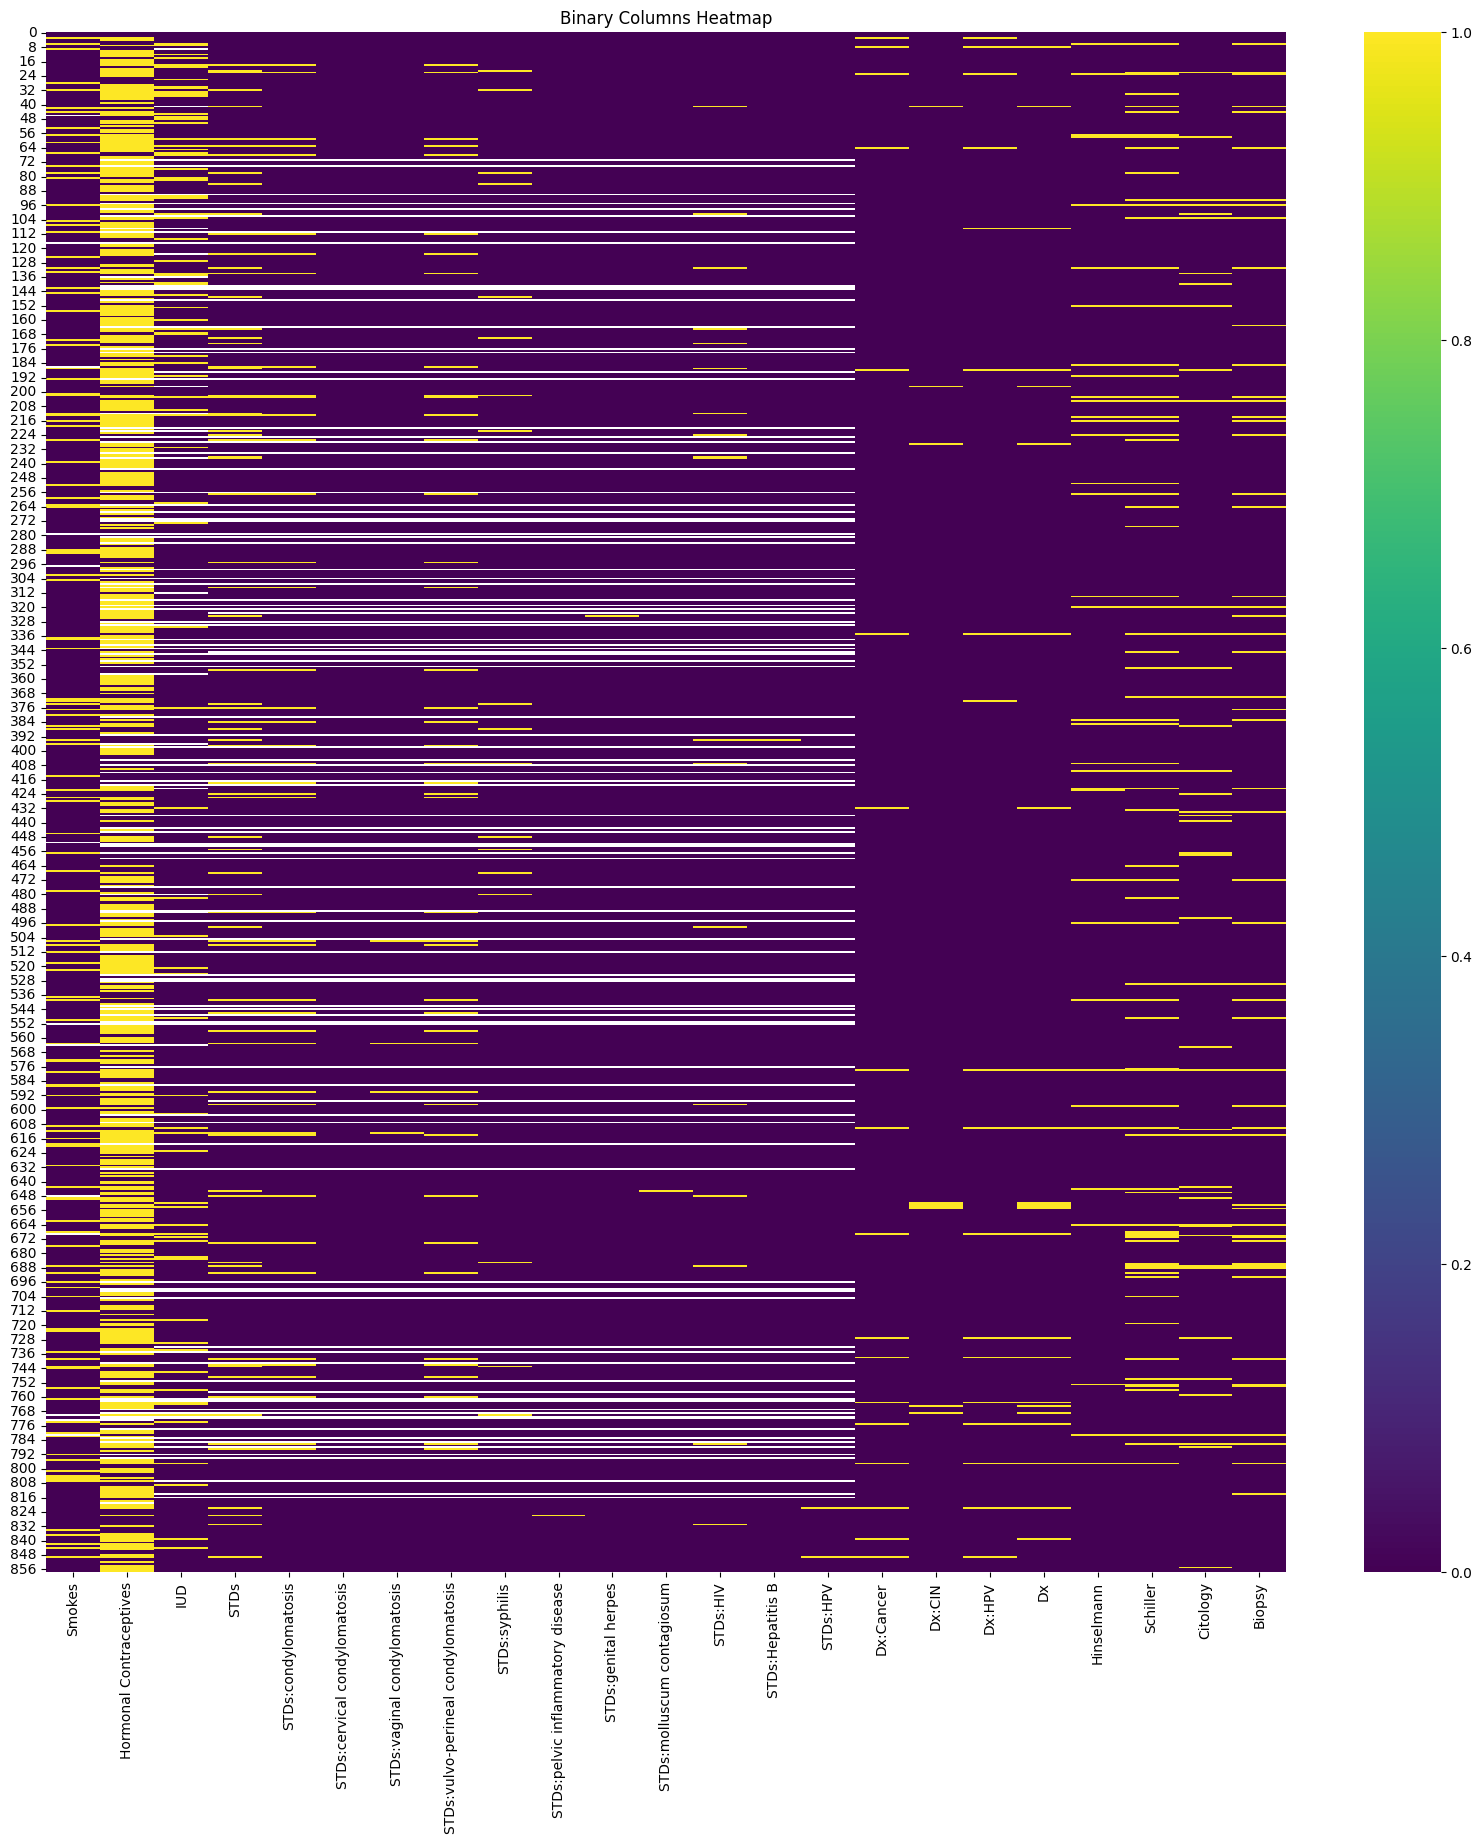

In [21]:
plt.figure(figsize=(20, 20))
# Using the viridis colormap for a cool and beautiful color scheme.
sns.heatmap(df[binary_cols], cbar=True, cmap="viridis", vmin=0, vmax=1)
plt.title("Binary Columns Heatmap")  # Adding a title for clarity
plt.show()

### Comments:

- Attributes such as Smokes, Hormonal Contraceptives, and IUD have more yellow (1/true) compared to others. Suggesting this is common in the dataset, did this have a high relation on the final `Dx`?
- Columns like Hinselmann, Schiller, Citology, and Biopsy have a particular pattern, showing that they are mostly performed in group rather than individually.
- Is interesting that the diagnostics for Dx.Cancer, Dx.CIN, and Dx.HPV are not widespread in the dataset.
- Hormonal Contraceptives is by much the most frequent variable (positive).

**How hormonal contraceptives (years) relates to Age?**

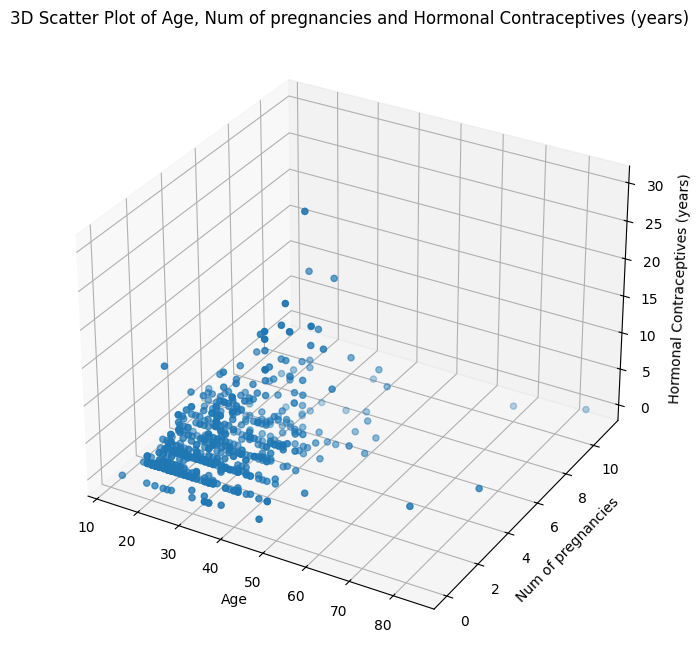

In [22]:
# Age
# Hormonal Contraceptives (years)
# Num of pregnancies
# How hormonal contraceptives (years) relates to Age and Num of pregnancies using 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')  # Adding a 3D subplot
ax.scatter(df['Age'], df['Num of pregnancies'], df['Hormonal Contraceptives (years)'])
ax.set_xlabel('Age')  # Setting the x-axis label
ax.set_ylabel('Num of pregnancies')  # Setting the y-axis label
ax.set_zlabel('Hormonal Contraceptives (years)')  # Setting the z-axis label
plt.title("3D Scatter Plot of Age, Num of pregnancies and Hormonal Contraceptives (years)")  # Adding a title
plt.show()


### Comments:
- This plot suggest that individuals in the dataset typically have fewer pregnancies, and use hormonal contraceptives for a shorter durations. This behavior is supported by the fact that most individuals are in the lower age range. The will be interesting to relate the Hormonal Contraceptives usage and First sexual intercourse.

How First sexual intercourse is related to Hormonal Contraceptives usage?

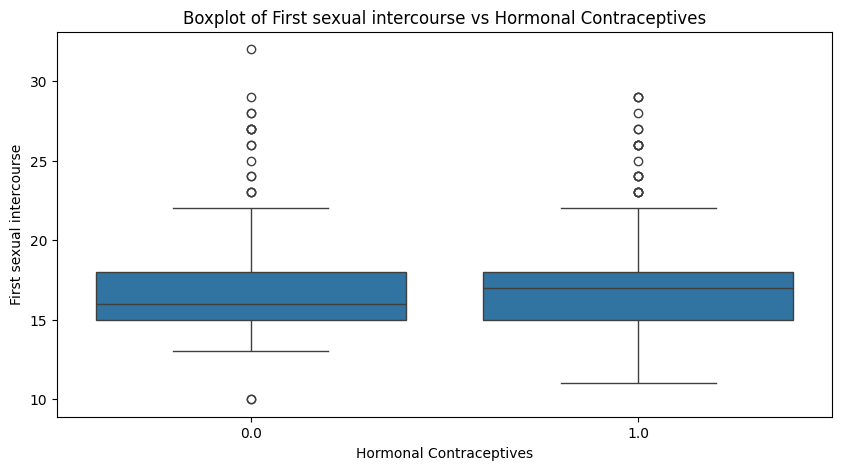

In [23]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Hormonal Contraceptives', y='First sexual intercourse', data=df)
plt.title("Boxplot of First sexual intercourse vs Hormonal Contraceptives")  # Adding a title
plt.show()

### Comments

- The age of first sexual intercourse does not appear to be significantly different between those how use hormonal contraceptive and those who don't.
- Based on the heatmap above, we found that the use of Hormonal Contraceptives is a common pattern in the dataset, however, it seems to have no strong relationship with other variables and could be a cultural pattern. This is just a superficial analysis, and we could find patterns or relevance with more advanced techniques. Anywise, is still a very interesting variable. 

## [4] Numeric variables isolation

💡 I manually selected the numerical columns, starting from the ones that had a Dtype of float64 or int64, and filtering them out later.


In [24]:
numerical_columns = [
    "Age",
    "Number of sexual partners",
    "First sexual intercourse",
    "Num of pregnancies",
    "Smokes (years)",
    "Smokes (packs/year)",
    "Hormonal Contraceptives (years)",
    "IUD (years)",
    "STDs (number)",
    "STDs: Number of diagnosis",
]

numerical_data = df[numerical_columns]
numerical_data.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,750.000000,741.000000,753.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,1.219721,0.453144,2.256419,0.514804,0.176627,0.087413
std,8.497948,1.667760,2.803355,1.447414,4.089017,2.226610,3.764254,1.943089,0.561993,0.302545
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,37.000000,37.000000,30.000000,19.000000,4.000000,3.000000


#### Correlation between the numerical features

                                      Age  Number of sexual partners  \
Age                              1.000000                   0.085634   
Number of sexual partners        0.085634                   1.000000   
First sexual intercourse         0.370017                  -0.150169   
Num of pregnancies               0.548856                   0.079081   
Smokes (years)                   0.218619                   0.186932   
Smokes (packs/year)              0.131946                   0.182067   
Hormonal Contraceptives (years)  0.289783                   0.019569   
IUD (years)                      0.216101                   0.004454   
STDs (number)                   -0.016186                   0.041442   
STDs: Number of diagnosis       -0.001606                   0.051900   

                                 First sexual intercourse  Num of pregnancies  \
Age                                              0.370017            0.548856   
Number of sexual partners                    

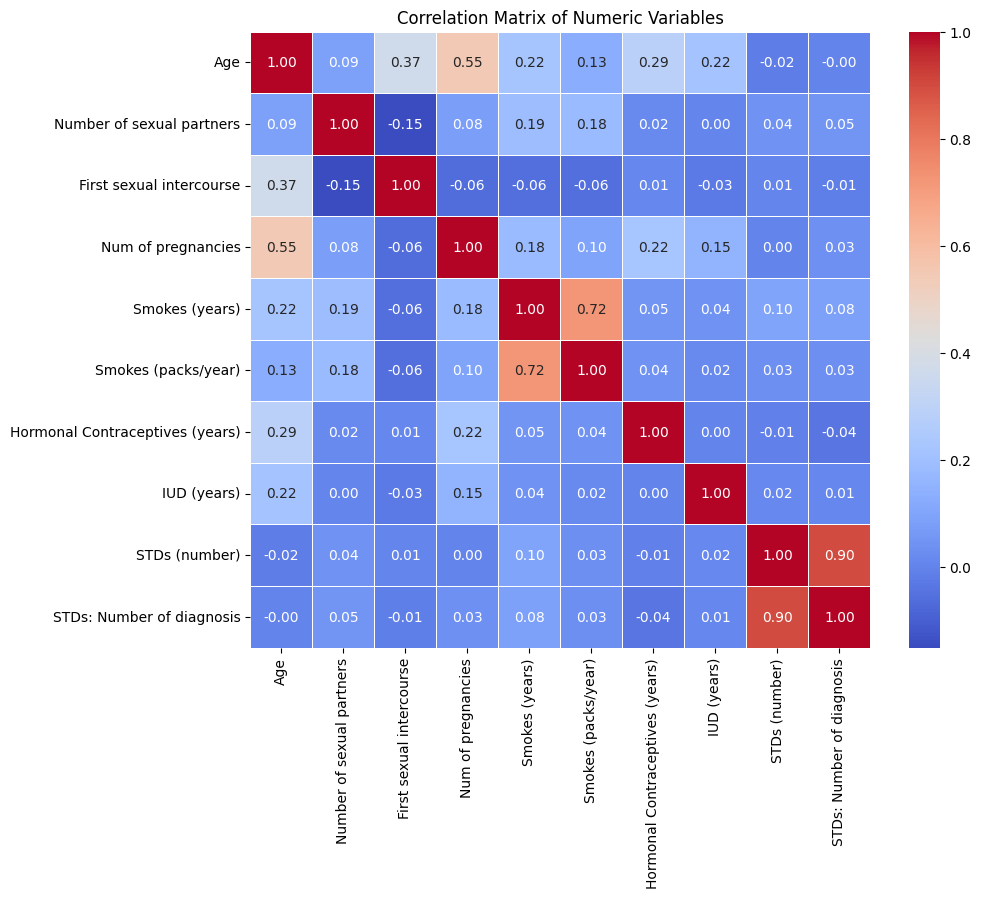

In [25]:
correlation_matrix = numerical_data.corr()

print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Variables")
plt.show()

### Comments:
The following stands out:
- Positive correlation between Hormonal Contraceptives and Number of Pregnancies. <br>
- Positive correlation between IUD  and Number of Pregnancies. <br>
- Positive correlation between Smoking Habits and number of Sexual Partners. (interesting)

## [5] Categorical Variable Analysis

Frecuencia de Dx:Cancer:
 Dx:Cancer
0    840
1     18
Name: count, dtype: int64
Proporción de Dx:Cancer:
 Dx:Cancer
0    0.979021
1    0.020979
Name: proportion, dtype: float64


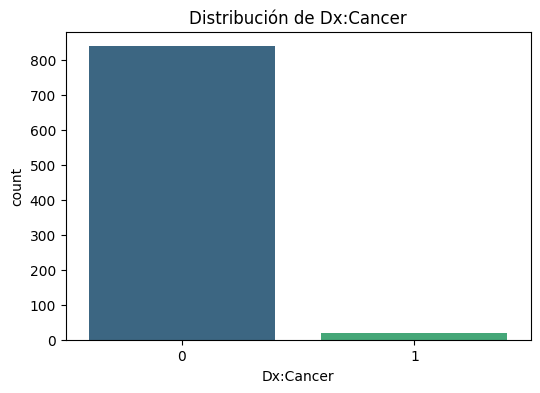

Correlaciones con Dx:Cancer:
 Dx:Cancer                          1.000000
Smokes (packs/year)                0.111572
Age                                0.110340
IUD (years)                        0.098113
First sexual intercourse           0.067289
Smokes (years)                     0.056234
Hormonal Contraceptives (years)    0.054712
Num of pregnancies                 0.035149
Number of sexual partners          0.022316
STDs: Number of diagnosis         -0.015423
STDs (number)                     -0.018256
Name: Dx:Cancer, dtype: float64
P-valores del test chi-cuadrado:
 Dx:HPV                                2.001635e-139
Dx                                     1.196776e-78
STDs:HPV                               1.681101e-11
Biopsy                                 2.369427e-05
Schiller                               2.689482e-05
Hinselmann                             8.663738e-04
Citology                               5.385376e-03
IUD                                    8.392210e-03
STDs

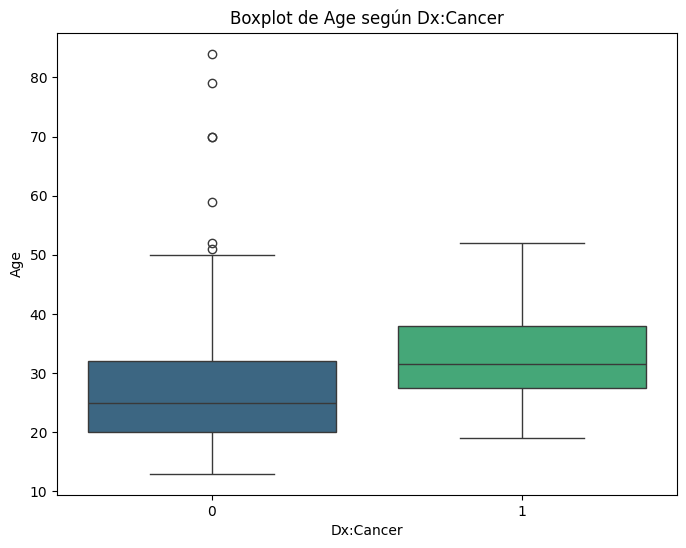

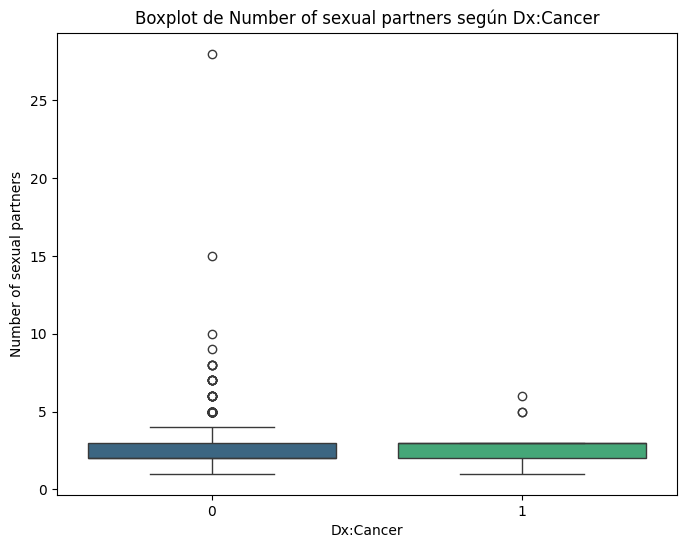

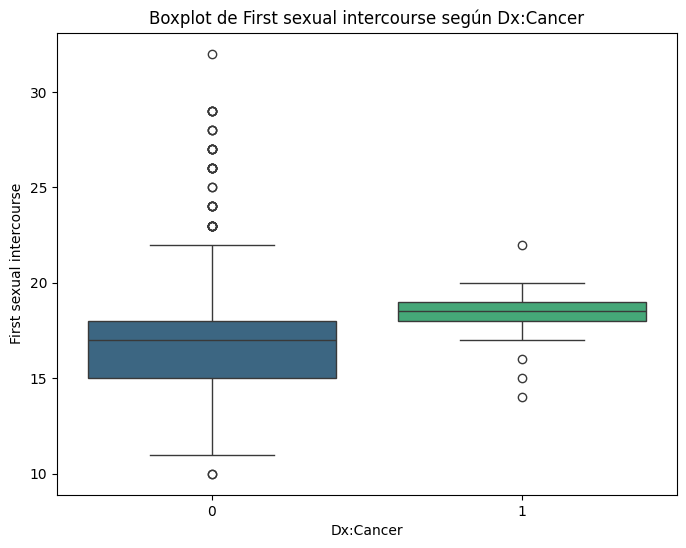

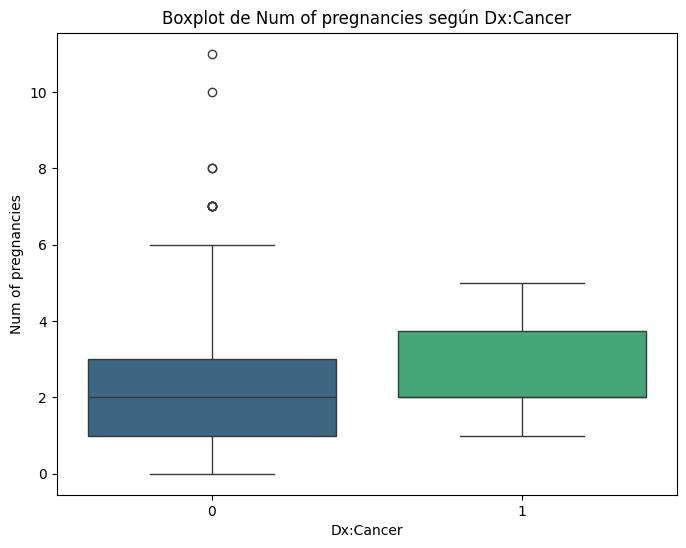

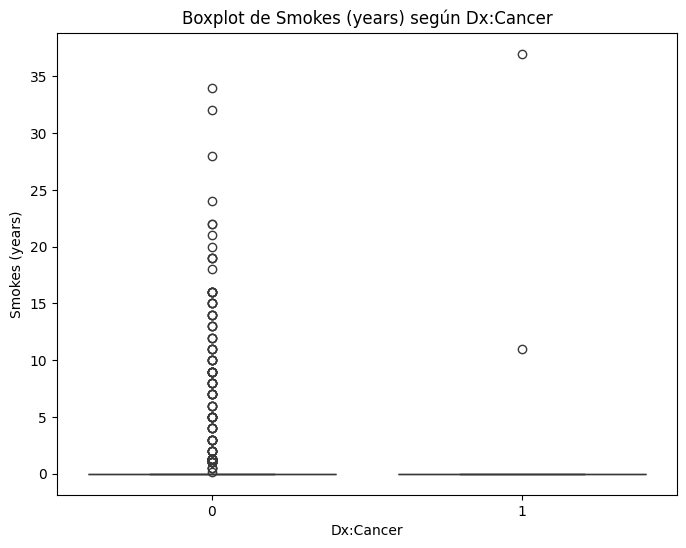

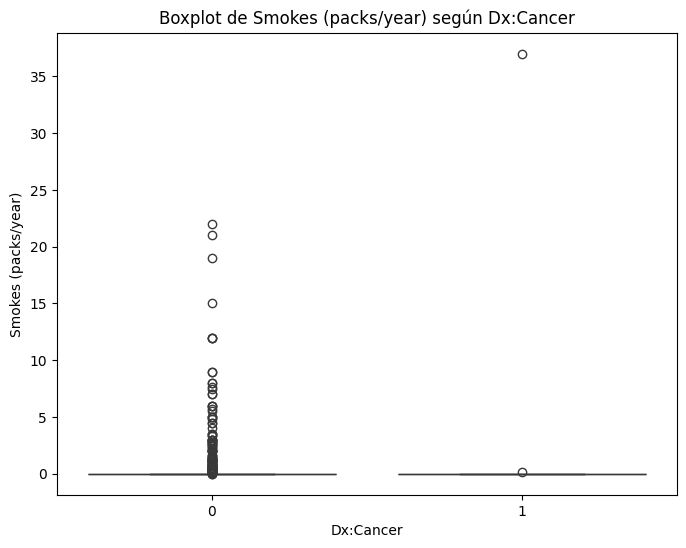

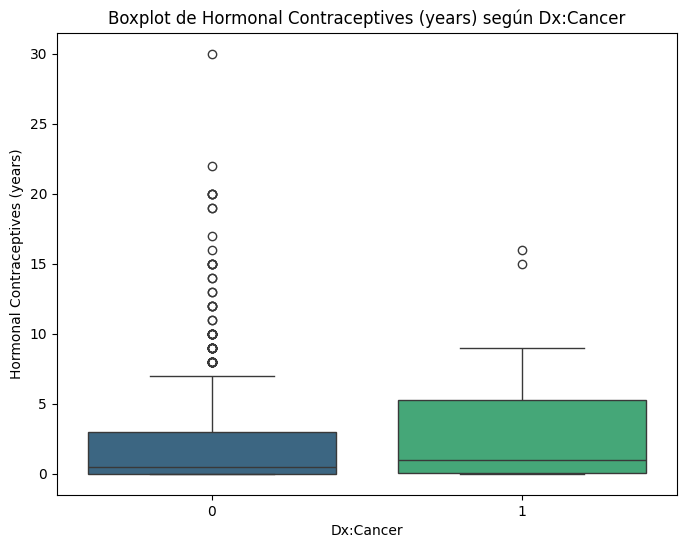

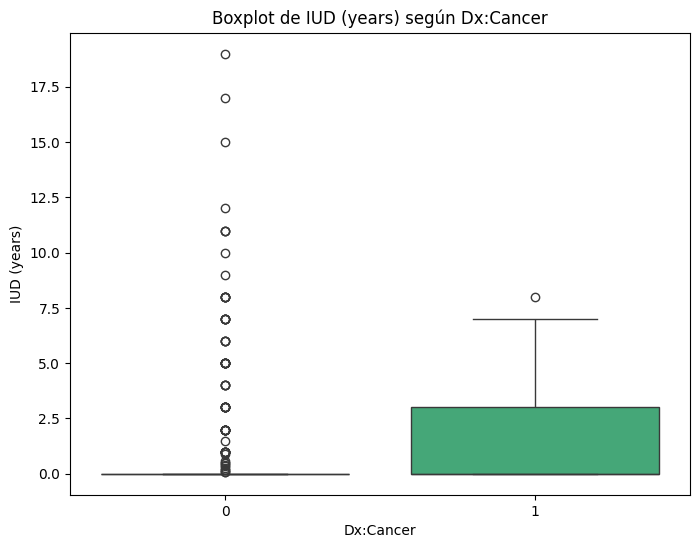

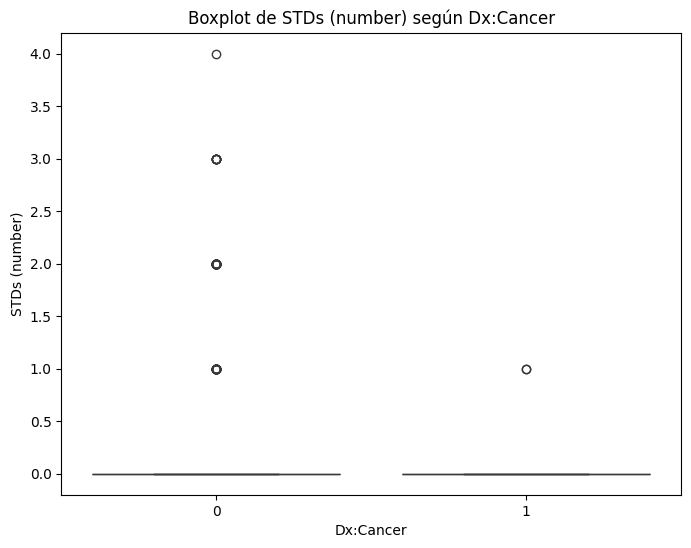

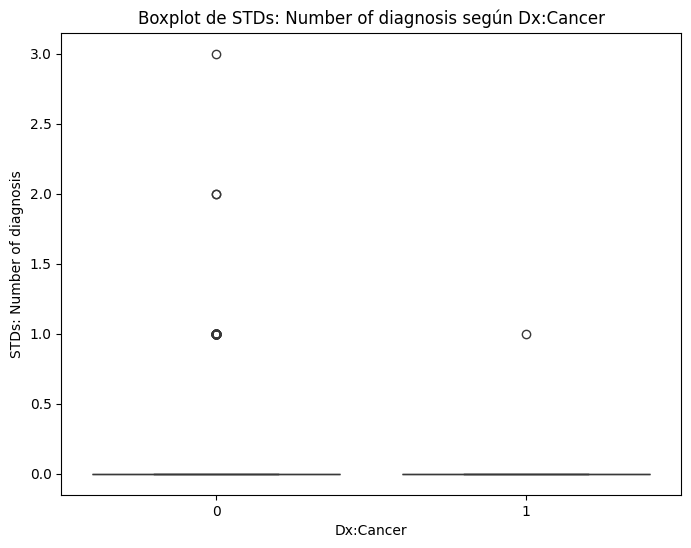

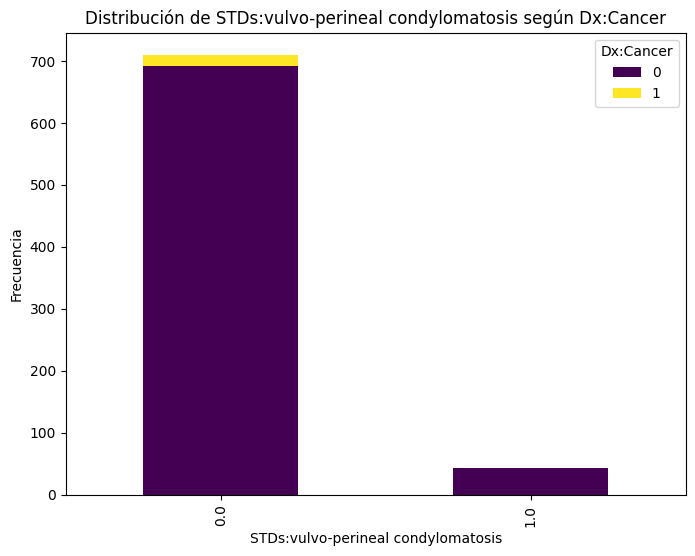

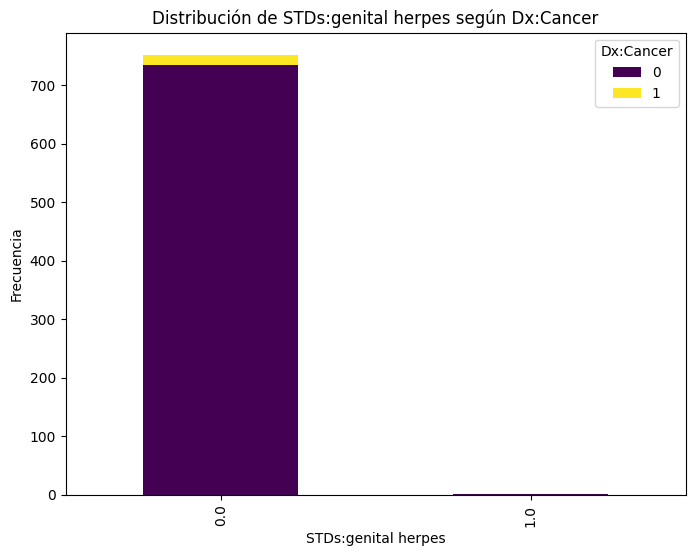

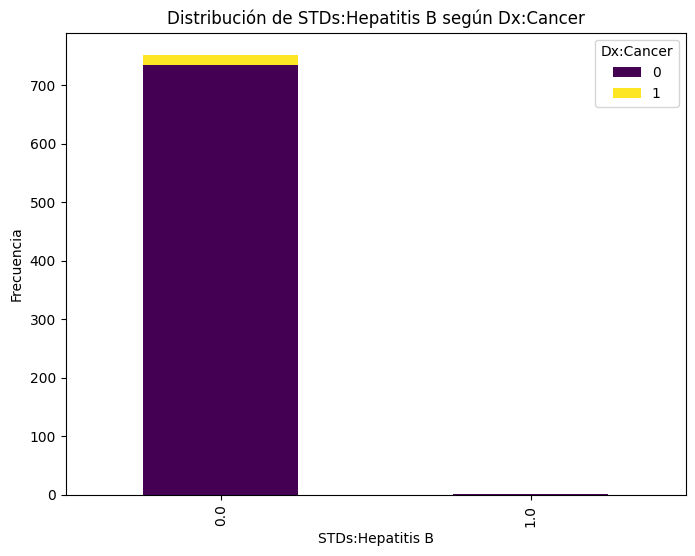

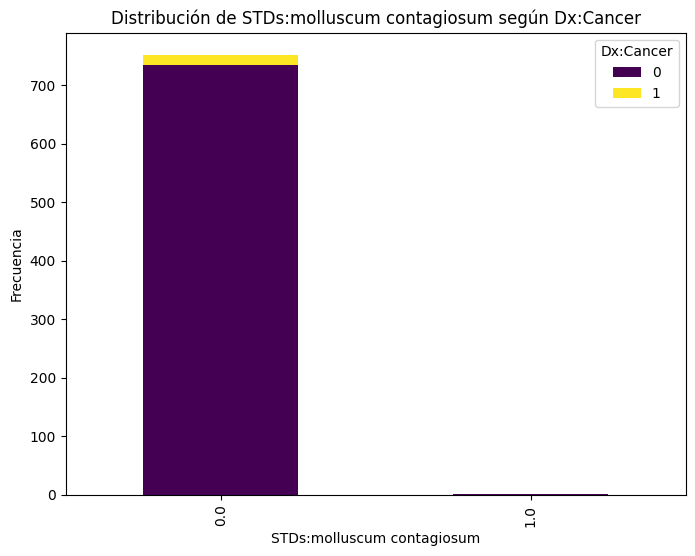

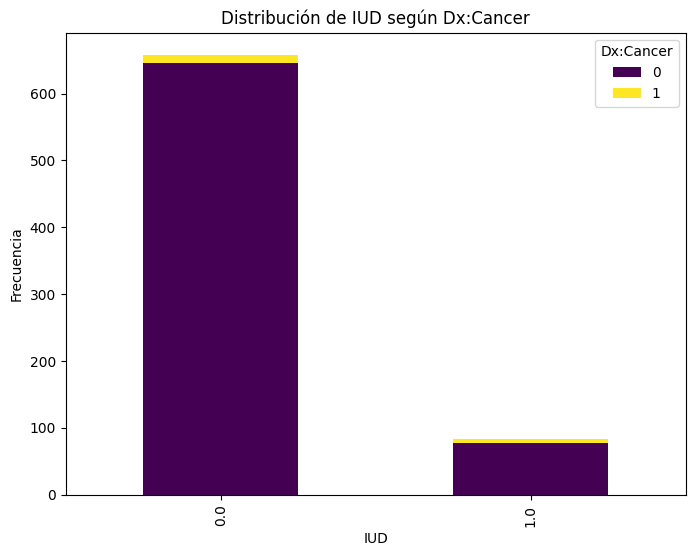

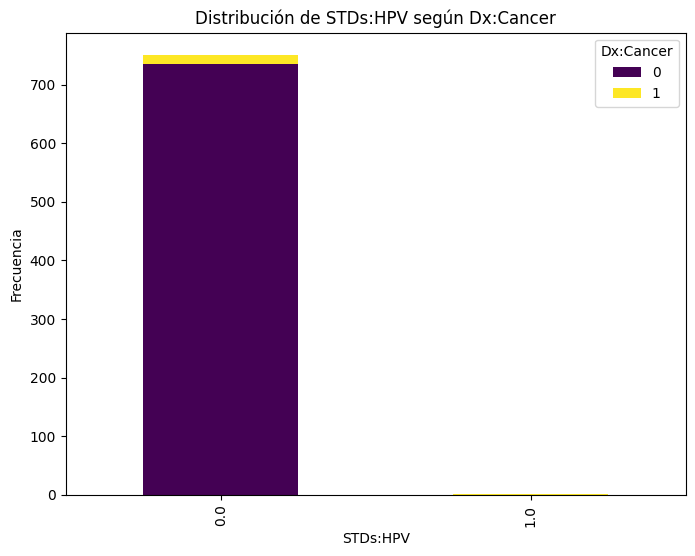

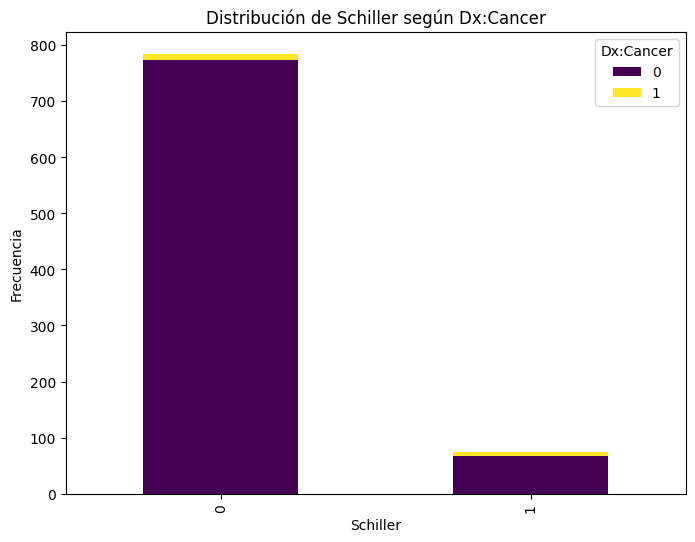

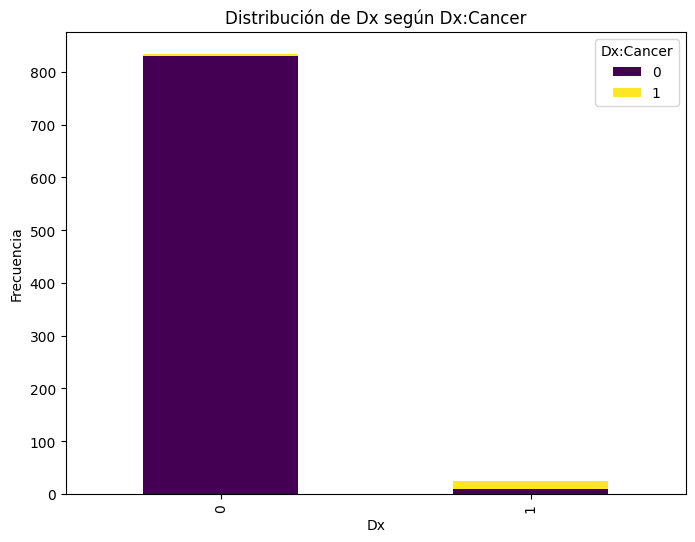

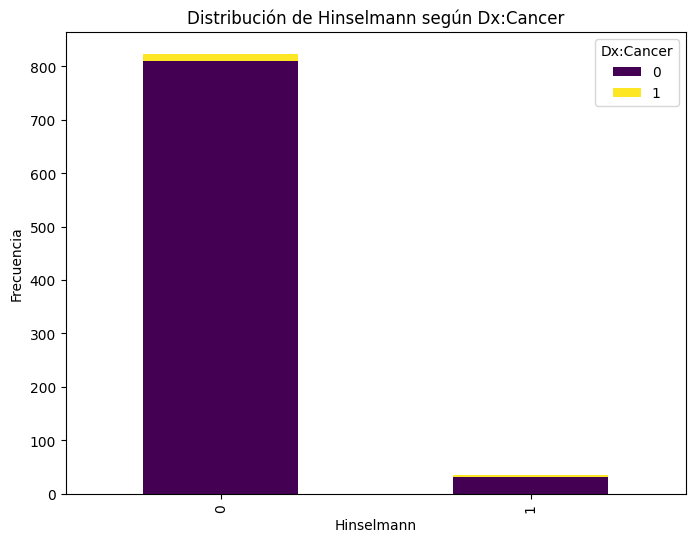

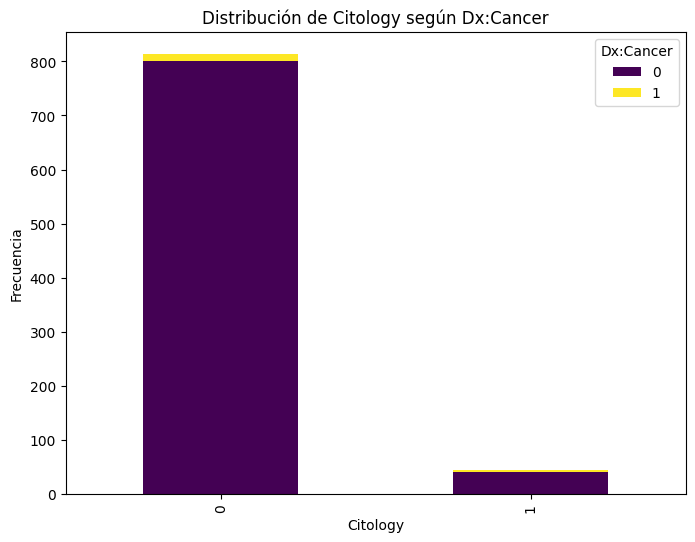

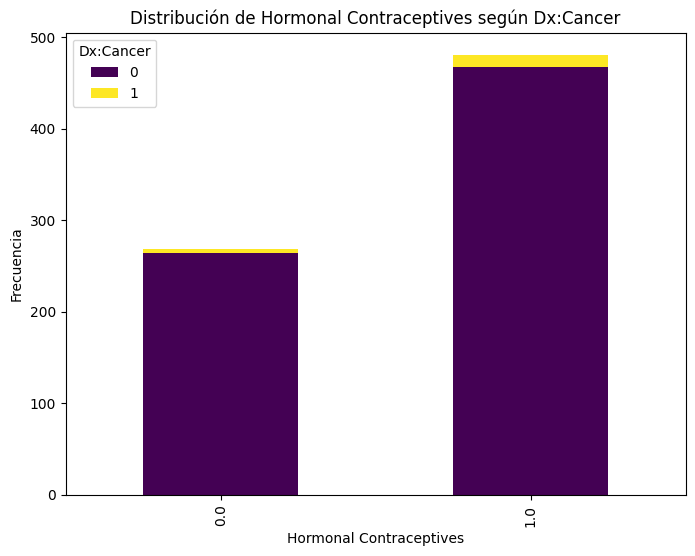

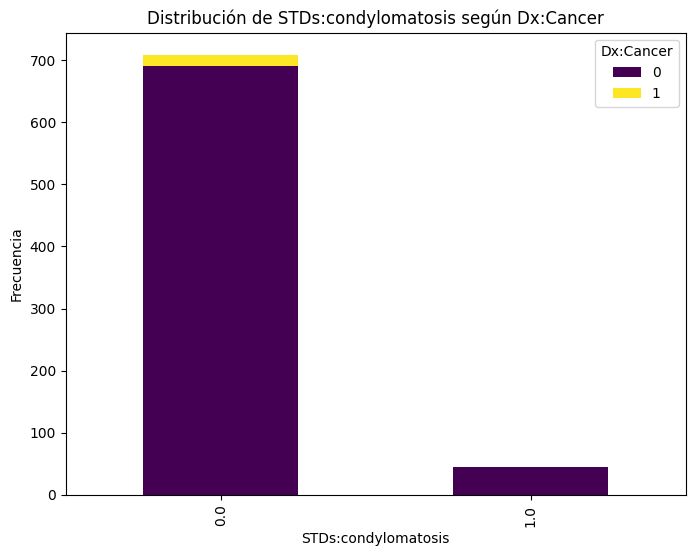

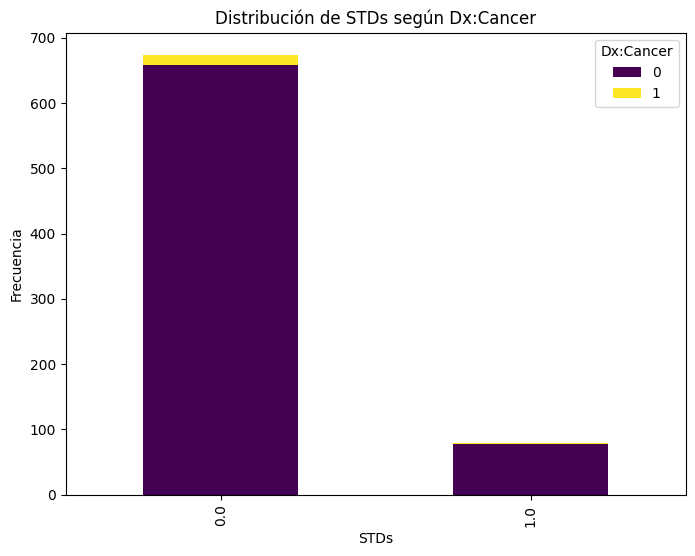

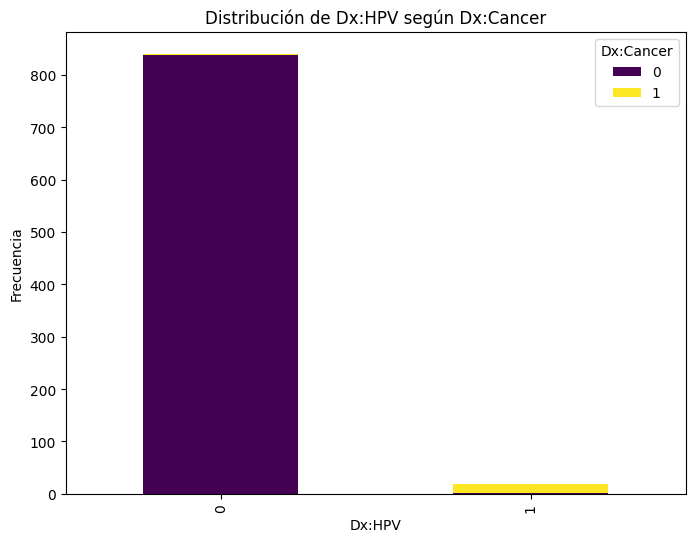

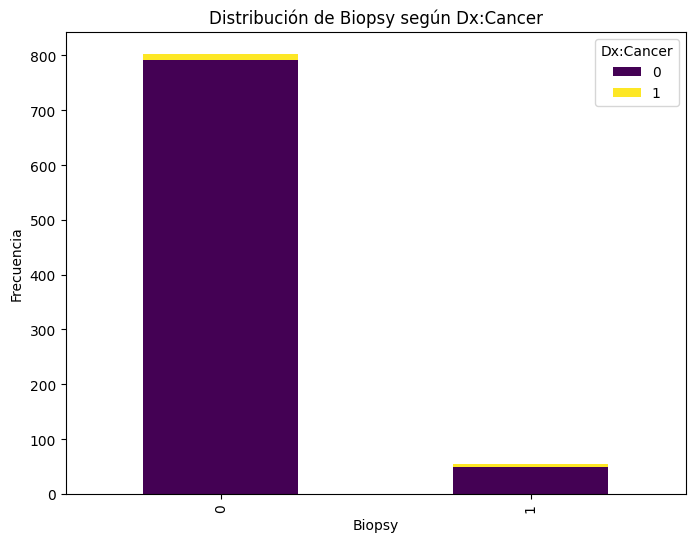

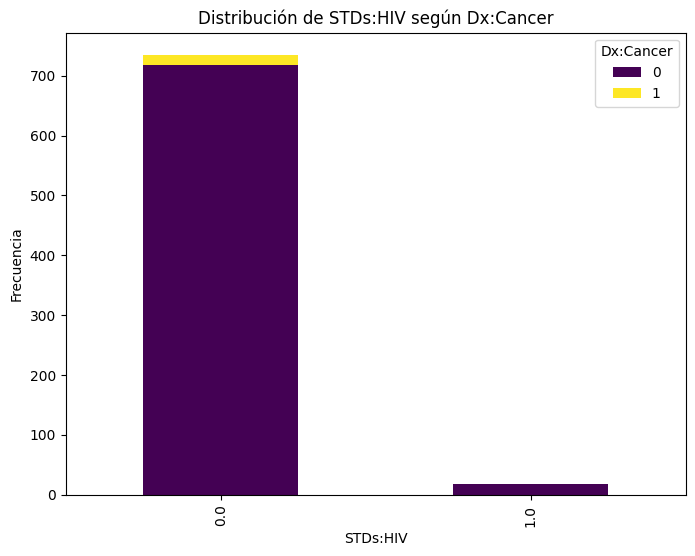

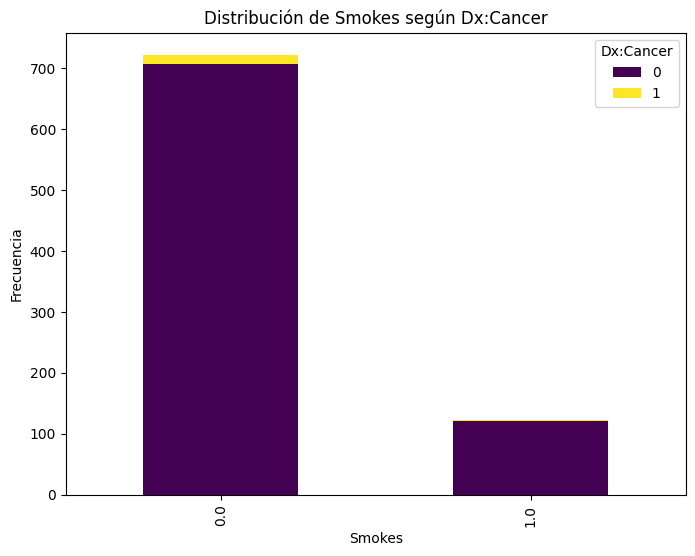

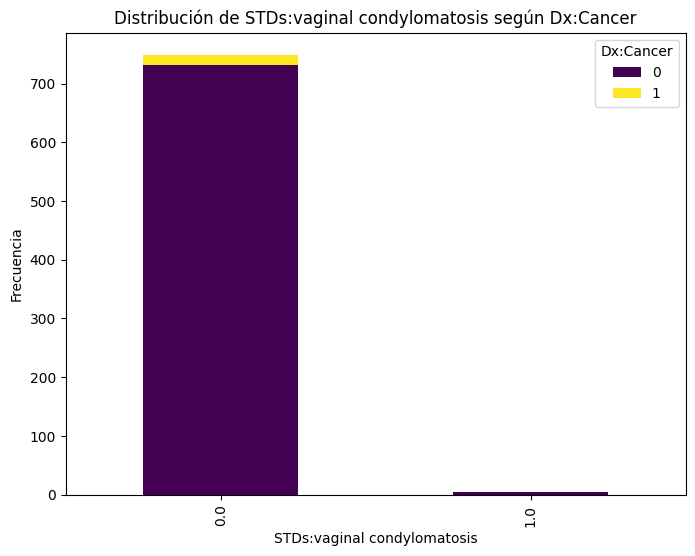

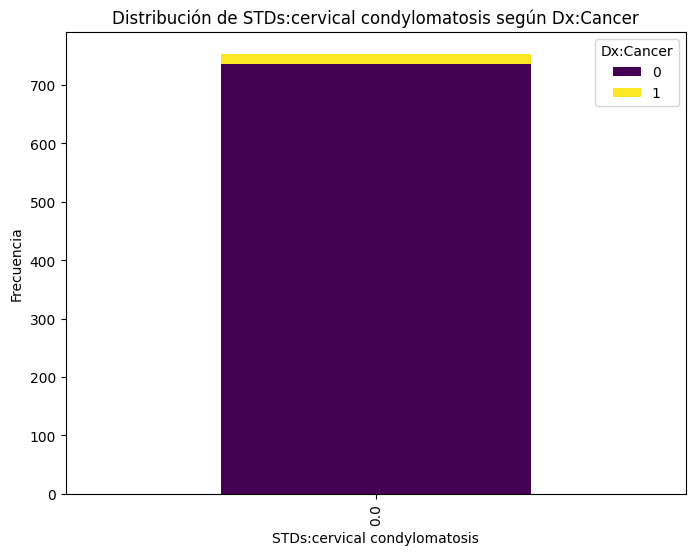

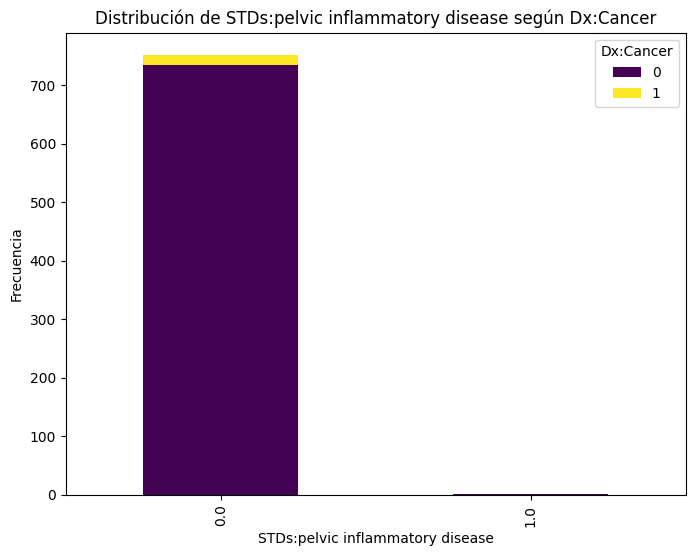

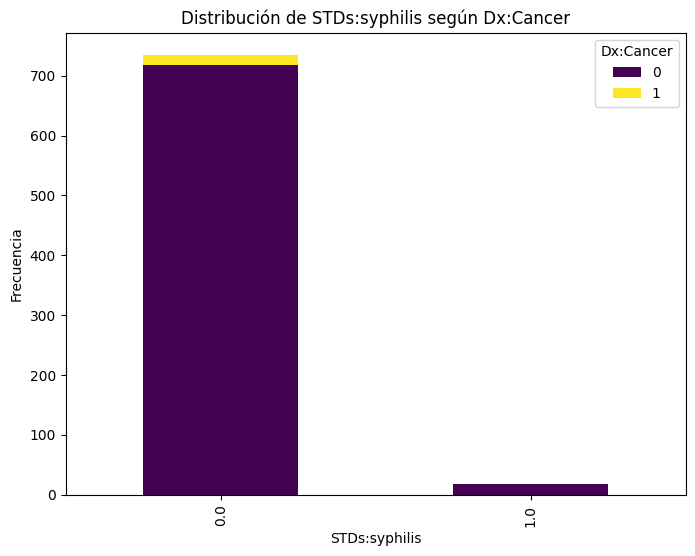

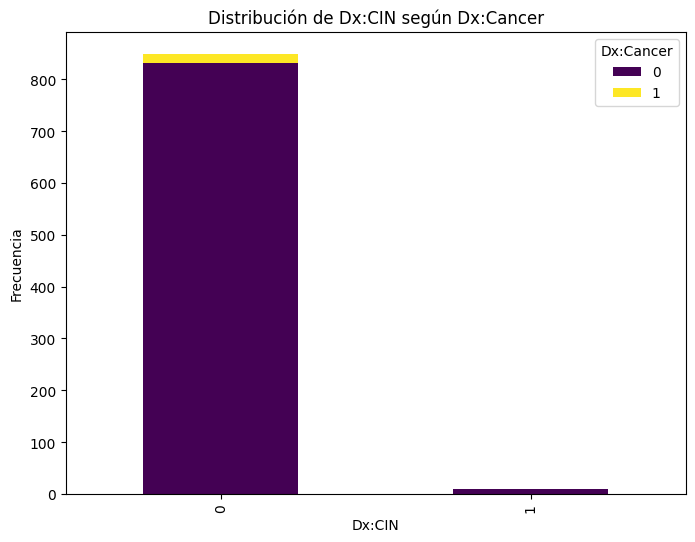

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

numerical_columns = [
    "Age",
    "Number of sexual partners",
    "First sexual intercourse",
    "Num of pregnancies",
    "Smokes (years)",
    "Smokes (packs/year)",
    "Hormonal Contraceptives (years)",
    "IUD (years)",
    "STDs (number)",
    "STDs: Number of diagnosis",
]

categorical_columns = list(
    set(df.columns) - set(numerical_columns) - set(["Dx:Cancer"])
)

# 1. Distribución de la variable respuesta
print("Frecuencia de Dx:Cancer:\n", df["Dx:Cancer"].value_counts())
print("Proporción de Dx:Cancer:\n", df["Dx:Cancer"].value_counts(normalize=True))

# Gráfico de barras de la variable respuesta
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Dx:Cancer", palette="viridis")
plt.title("Distribución de Dx:Cancer")
plt.show()

# 2. Análisis de correlación con variables numéricas
correlation_with_cancer = (
    df[numerical_columns + ["Dx:Cancer"]]
    .corr()["Dx:Cancer"]
    .sort_values(ascending=False)
)
print("Correlaciones con Dx:Cancer:\n", correlation_with_cancer)

# 3. Análisis de asociación con variables categóricas
chi2_results = {}
for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df["Dx:Cancer"])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    chi2_results[col] = p

chi2_results = pd.Series(chi2_results).sort_values()
print("P-valores del test chi-cuadrado:\n", chi2_results)

# 4. Visualizaciones específicas

# Boxplots para comparar distribuciones numéricas según Dx:Cancer
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x="Dx:Cancer", y=col, data=df, palette="viridis")
    plt.title(f"Boxplot de {col} según Dx:Cancer")
    plt.show()

# Gráficos de barras apiladas para ver la distribución de categorías según Dx:Cancer
for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df["Dx:Cancer"])
    contingency_table.plot(kind="bar", stacked=True, figsize=(8, 6), colormap="viridis")
    plt.title(f"Distribución de {col} según Dx:Cancer")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()